# Aprendizaje Computacional  

## Mario Graff (mgraffg@ieee.org, mario.graff@infotec.mx)  
## [https://github.com/ingeotec](https://github.com/ingeotec)
## [https://github.com/mgraffg](https://github.com/mgraffg)
## CONACYT - INFOTEC

# Temas  

1. Introducción  
2. Aprendizaje supervisado  
3. Métodos paramétricos  
4. Métodos no-paramétricos  
5. Máquinas de kernel  
6. Métodos no convencionales de aprendizaje  
7. Diseño y análisis de experimentos de aprendizaje  
8. Aplicaciones

# Métodos Paramétricos  

3.1. Teoría Bayesiana de Decisión  
3.2. Clasificación  
3.3. Máxima Verosimilitud  
3.4. Funciones de probabilidad  
3.5. Clasificación de texto  
3.6. Bayes Ingenuo  
3.7. Discriminación Linea  
3.8. Regresión  


# Teoría Bayesiana de Decisión

* Variables no observadas  
  $r = f(x)$
* En general no es posible  
* Modela un volado como:  
  * $P(X=cara) = 0.5$

Suponiendo que existe una función determinista $f$ que genera $r = f(x)$.

# Clasificación

* Un problema de clasificación se puede modelar como:  
  $P(C \mid x)$

$P(C \mid x)$ es la probabilidad de $C$ dada la entrada $x$. Suponiendo $K$ clases
se sabe $P(C = 1 \mid x) + P(C = 2 \mid x) + \ldots + P(C = K \mid x) = 1$

* Utilizando el teorema de Bayes  
  $P(C \mid x) = \frac{P(x \mid C) P(C)}{P(x)}$  

  * $P(C \mid x)$ probabilidad posterior _posterior probability_
  * $P(C)$ probabilidad previa _prior probability_  
  * $P(x \mid C)$ probabilidad de clase _class likelihood_
  * $P(x)$ evidencia _evidence_

  * $P(x) = \sum_C P(x, C) = \sum_C P(x \mid C)P(C)$

  * $P(x) = P(x \mid C=1) P(C=1) + P(x \mid C=0) P(C=0)$

# Clasificación (2)

* $P(C_i \mid x) = \frac{P(x \mid C_i) P(C_i)}{P(x)}$
* El objeto $x$ pertenece a la clase  
  $k = \text{argmax}_i P(C_i \mid x)$

* Funciones de decisión  
  $g_i(x) = P(C_i \mid x)$
* Equivalente  
  $g_i(x) = P(x \mid C_i) P(C_i)$  
* Para dos clases se puede  
  $g(x) = g_1(x) - g_2(x)$ 

# Estimador de Máxima Verosimilitud -  _Maximum Likelihood Estimation_

* $x_i \sim P(x \mid \theta)$
* Verosimilitud $l(\theta \mid \mathcal X)$  


* $l(\theta \mid \mathcal X) \equiv P(\mathcal X \mid \theta)$
* Dado que son iid.  
  $P(\mathcal X \mid \theta) = \prod_i P(x_i \mid \theta)$


* $\mathcal L(\theta \mid \mathcal X) = \log l(\theta \mid \mathcal X) = \sum_i \log P(x_i \mid \theta)$

# Bernoulli  

* $p = P(x=1)$
* $P(x) = p^x (1 - p)^{1-x}$  
  $x \in \{0, 1\}$
* $\theta = p$

* $l(p \mid \mathcal X) = P(\mathcal X \mid p) = \prod_i p^{x_i} (1 - p)^{1-x_i}$  
* $\mathcal L(p \mid \mathcal X) = \sum_i \log p^{x_i} (1 - p)^{1-x_i}$
* $ = \sum_i ( \log p^{x_i} + \log (1 - p)^{1-x_i}) = \sum_i x_i \log p + \sum_i (1- x_i) \log (1 - p)$
* $ = \sum_i x_i \log p + (N - \sum_i x_i) \log (1 - p)$

* $\hat{p} = \frac{\partial \mathcal L(p \mid \mathcal X)}{\partial p}$
* $\hat{p} = \frac{\sum_i x_i}{N}$

# Bernulli multiples variables

* $\mathbf x = (x_1, x_2, \ldots, x_d)$  
  donde $x_i = \{0, 1\}$
* $P(\mathbf x \mid C_i) = \prod_j^d P(x_j = 1 \mid C_i)^{x_j} (1 - P(x_j = 1 \mid C_i))^{1-x_j}$

* $P(x_j = 1 \mid C_i) = \frac{\sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) \delta(w_j)}{\sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r)} $

* $P(C_i \mid \mathbf x) = \frac{P(\mathbf x \mid C_i) P(C_i)}{P(\mathbf x)}$

* $\mathbf x$ es la clase  
  $\text{argmax}_i P(C_i \mid \mathbf x) = \text{argmax}_i \log P(C_i \mid \mathbf x)$
* $ = \text{argmax}_i \log P(\mathbf x \mid C_i) + \log P(C_i) - \log P(\mathbf x)$
* $ = \text{argmax}_i \log P(\mathbf x \mid C_i) + \log P(C_i)$  

* $ = \text{argmax}_i \log P(C_i) + \sum_j^d \log P(x_j = 1 \mid C_i)^{x_j} (1 - P(x_j = 1 \mid C_i))^{1-x_j}$
* $= \text{argmax}_i \log P(C_i) + \sum_j^d x_j \log P(x_j = 1 \mid C_i) + (1-x_j) \log (1 - P(x_j = 1 \mid C_i))$
* $ = \text{argmax}_i  \sum_j^d x_j w_j^i + (1-x_j) v_j^i + z_i$
* $z_i = \log P(C_i)$
* $w_j^i = \log P(x_j = 1 \mid C_i)$
* $v_j^i = \log (1 - P(x_j = 1 \mid C_i))$

# Clasificación de Texto con Bernulli

* Una manera muy simple es ver un documento como una bolsa de palabras
* Hoy es un día feliz
* La la computadora
* Feliz de tener una computadora
* Fallo una computadora

|la  |computadora|feliz|hoy|es|un|día|de|tener|una|fallo|  
|---:|----------:|----:|--:|-:|-:|--:|-:|----:|--:|----:|  
|0   |0          |1    |1  |1 |1 |1  |0 |0    |0  |0    |
|1   |1          |0    |0  |0 |0 |0  |0 |0    |0  |0    |
|0   |1          |1    |0  |0 |0 |0  |1 |1    |1  |0    |
|0   |1          |0    |0  |0 |0 |0  |0 |0    |1  |1    |

# Clases

* Hoy es un día feliz - Positivo
* La la computadora - Neutro
* Feliz de tener una computadora - Positivo
* Fallo una computadora - Negativo
 

# Clase Positiva

* Hoy es un día feliz - Positivo
* Feliz de tener una computadora - Positivo

* $w_j^i = \log P(x_j = 1 \mid C_i)$

|la  |computadora|feliz|hoy|es|un|día|de|tener|una|fallo|     |
|---:|----------:|----:|--:|-:|-:|--:|-:|----:|--:|----:|----:|
|0   |0          |1    |1  |1 |1 |1  |0 |0    |0  |0    |     |
|0   |1          |1    |0  |0 |0 |0  |1 |1    |1  |0    |     |
|0   |0.5        |1    |0.5|0.5|0.5|0.5|0.5|0.5|0.5|0   |$P(x_j=1 \mid C_i)$  |


# Clase Positiva (2)

* Fallo una computadora
* $P(\mathbf x \mid C_i) = \prod_j^d P(x_j = 1 \mid C_i)^{x_j} (1 - P(x_j = 1 \mid C_i))^{1-x_j}$

|la  |computadora|feliz|hoy|es|un|día|de|tener|una|fallo|    |  
|---:|----------:|----:|--:|-:|-:|--:|-:|----:|--:|----:|---:|  
|0   |1          |0    |0  |0 |0 |0  |0 |0    |1  |1    |$\mathbf x$|
|0   |0.5        |1    |0.5|0.5|0.5|0.5|0.5|0.5|0.5|0   |$P(x_j=1 \mid C_i)$ |


# Laplacean prior
* $P(x_j = 1 \mid C_i) = \frac{1 + \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) \delta(w_j)}{d + \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r)} $  
  

# Actividad

Crear un clasificador por lenguaje, que dado un texto determine su polaridad dentro de 7 clases que corresponden a diferentes niveles de positividad y negatividad del texto.

* 3 - Muy positivo
* 2 - Moderadamente positivo
* 1 - Poco positivo
* 0 - Neutro
* -1 - Poco negativo
* -2 - Moderadamente negativo
* -3 - Muy negativo.

# Pasos

* Leer la descripción de la tarea Task 1 - V-oc de [SemEval 2018 Task 1](https://competitions.codalab.org/competitions/17751#learn_the_details-overview)
* Bajar de [SemEval 2018 Task 1 Dataset](https://competitions.codalab.org/competitions/17751#learn_the_details-datasets) los datos correspondientes a V-oc  
  * English   
    * Training set  
    * Development set
    * Test set
  * Arabic   
    * Training set  
    * Development set
    * Test set
  * Spanish   
    * Training set  
    * Development set
    * Test set      

# Pasos (2)

Recuerden, los datos que acaban de bajar no pueden ser utilizados con fines comerciales.

* Combinar por cada idioma los archivos _Training set_ y _Development set_  
  este es su conjunto $\mathcal X$
* El conjunto _Test set_ es $\mathcal P$
* Utilizar $\mathcal X$ para obtener $w_j^i$, $v_j^i$, y $z_i$ de  
  $\text{argmax}_i  \sum_j^d x_j w_j^i + (1-x_j) v_j^i + z_i$
* Predecir $\mathcal P$ con el modelo anterior  
* Medir el rendimiento de su clasificador usando:  
  * macro-F1  
  * accuracy  
  * macro-Recall  
  * macro-Precision
  * Ver [scikit-learn metrics](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics)
* Enviar un reporte con los resultados (una hoja)
* Enviar el código de su clasificador  

# Multinomial

* Tamaño del vocabulario $d$.
* $\mathbf x$ es un documento
* $\mathbf x \in \mathbb R^d$
* $P(C_i \mid \mathbf x) = \frac{P(\mathbf x \mid C_i) P(C_i)}{P(\mathbf x)}$


* $P(\mathbf x \mid C_i) = (\sum_j x_j)! \prod_j \frac{p(x_j \mid C_j)^{x_j}}{x_j!}$
* Bernulli  
  * $P(\mathbf x \mid C_i) = \prod_j^d P(x_j = 1 \mid C_i)^{x_j} (1 - P(x_j = 1 \mid C_i))^{1-x_j}$

* $P(x_j \mid C_i) = \frac{1 + \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) w_j}{d + \sum_k^d \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) w_k}$

* $P(\mathbf x \mid C_i) = (\sum_j x_j)! \prod_j \frac{p(x_j \mid C_j)^{x_j}}{x_j!}$
* $(\sum_j x_j)!$ y $\prod_j x_j!$
* $P(\mathbf x \mid C_i) \propto \prod_j p(x_j \mid C_j)^{x_j}$
* $P(C_i \mid \mathbf x) = \frac{P(\mathbf x \mid C_i) P(C_i)}{P(\mathbf x)}$
* $P(C_i \mid \mathbf x) \propto \prod_j p(x_j \mid C_j)^{x_j}$

# Clasificación de Texto con Multinomial

* Una manera muy simple es ver un documento como una bolsa de palabras
* Hoy es un día feliz
* La la computadora
* Feliz de tener una computadora
* Fallo una computadora

|la  |computadora|feliz|hoy|es|un|día|de|tener|una|fallo|  
|---:|----------:|----:|--:|-:|-:|--:|-:|----:|--:|----:|  
|0   |0          |1    |1  |1 |1 |1  |0 |0    |0  |0    |
|2   |1          |0    |0  |0 |0 |0  |0 |0    |0  |0    |
|0   |1          |1    |0  |0 |0 |0  |1 |1    |1  |0    |
|0   |1          |0    |0  |0 |0 |0  |0 |0    |1  |1    |


* $P(x_j \mid C_i) = \frac{1 + \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) w_j}{d + \sum_k^d \sum_{\mathbf w, r \in \mathcal X} \delta(C_i = r) w_k}$

|la  |computadora|feliz|hoy|es|un|día|de|tener|una|fallo|     |
|---:|----------:|----:|--:|-:|-:|--:|-:|----:|--:|----:|----:|
|0   |0          |1    |1  |1 |1 |1  |0 |0    |0  |0    |     |
|0   |1          |1    |0  |0 |0 |0  |1 |1    |1  |0    |     |
|0   | $\frac{1 + 1}{d + 10}$ | $\frac{1 + 2}{d + 10}$   |-|-|-|-|-|-|-|- |$P(x_j \mid C_i)$  |


# Actividad

* Implementar un algoritmo de clasificación utilizando _Multinomial_
* Medir el rendimiento utilizando
  * macro-F1  
  * accuracy  
  * macro-Recall  
  * macro-Precision
* Comparar los resultados con los obtenidos utilizando _Bernulli_  


# Distribución Normal

* Las entradas $\mathbf x \in \mathbb R^d$
* $P(C_i \mid \mathbf x) = \frac{P(\mathbf x \mid C_i) P(C_i)}{P(\mathbf x)}$
* $P(\mathbf x) = \frac{1}{ (2 \pi)^{\frac{d}{2}} \mid \Sigma \mid ^{\frac{1}{2}}} \exp{-\frac{1}{2} (\mathbf x - \mathbf \mu)' \Sigma^{-1} (\mathbf x - \mathbf \mu)}$
* Bayes Ingenuo

# Bayes Ingenuo _Naive Bayes_

* $P(\mathbf x) = \prod_i^d p_i(x_i)$
* $P(\mathbf x) = \frac{1}{ (2 \pi)^{\frac{d}{2}} \prod_i^d \sigma_i} \exp{-\frac{1}{2} \sum_i^d (\frac{x_i - \mu_i}{\sigma_i})^2}$

In [1]:
%pylab inline
import pandas as pd
import numpy as np
pos = np.random.multivariate_normal([0, 0.3], 
                                    [[0.3, 0.1], [0.1, 0.3]], size=100)
neg = np.random.multivariate_normal([2.3, -0.3], 
                                    [[0.1, 0.01], [0.01, 0.3]], size=100)

Populating the interactive namespace from numpy and matplotlib


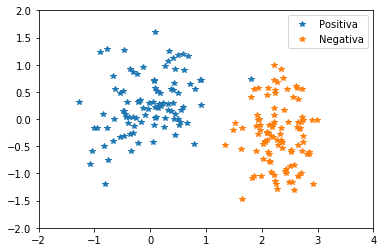

In [2]:
pylab.plot([x[0] for x in pos], [x[1] for x in pos], '*')
pylab.plot([x[0] for x in neg], [x[1] for x in neg], '*')
pylab.ylim(-2, 2)
pylab.xlim(-2, 4)
pylab.legend(['Positiva', 'Negativa'])

In [3]:
y = np.zeros(pos.shape[0] + neg.shape[0])
y[:pos.shape[0]] = 1
X = np.concatenate((pos, neg))

* Sea $\mathbf X$ el conjunto de entrenamiento
* Sea $y$ la clase asociada
* Entrenando un Bayes Ingenuo con _sklearn_

```python   
from sklearn.naive_bayes import GaussianNB
m = GaussianNB().fit(X, y)
```

* Predecir un conjunto no visto
* Graficar los puntos clasificados incorrectamente

In [4]:
from sklearn.naive_bayes import GaussianNB
m = GaussianNB().fit(X, y)

In [5]:
posT = np.random.multivariate_normal([0, 0.3], 
                                     [[0.3, 0.1], [0.1, 0.3]], size=1000)
negT = np.random.multivariate_normal([2.3, -0.3], 
                                     [[0.1, 0.01], [0.01, 0.3]], size=1000)
pos_e = ~ (m.predict(posT) == 1)
neg_e = ~ (m.predict(negT) == 0)

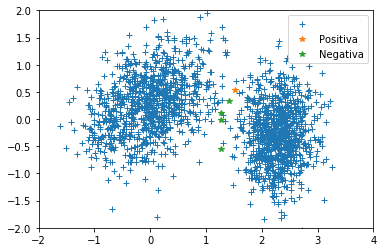

In [6]:
pos = posT[pos_e]
neg = negT[neg_e]
todos = np.concatenate((posT[~pos_e], negT[~neg_e]))
pylab.ylim(-2, 2)
pylab.xlim(-2, 4)
pylab.plot([x[0] for x in todos], [x[1] for x in todos], '+')
pylab.plot([x[0] for x in pos], [x[1] for x in pos], '*')
pylab.plot([x[0] for x in neg], [x[1] for x in neg], '*')
pylab.legend(['', 'Positiva', 'Negativa'])

# Función de Decisión

* $g(\mathbf x) = g_2(\mathbf x) - g_1(\mathbf x)$
* $ = P(C_2 \mid \mathbf x) - P(C_1 \mid \mathbf x)$

* Se busca
* $g(\mathbf x) = P(C_2 \mid \mathbf x) - P(C_1 \mid \mathbf x) = 0$

In [7]:
def boundary(x, y, m):
    px = []
    py = []
    for y0 in y:
        pr = m.predict(np.vstack((x, [y0] * x.shape[0])).T)
        df = np.fabs(pr[1:] - pr[:-1])
        step = np.where(df > 0)[0]
        if len(step):
            for x0 in step:
                py.append(y0)
                px.append(x[x0])
    return px, py

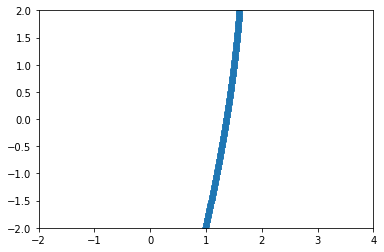

In [8]:
x = np.linspace(-2, 4, 1000)
y = np.linspace(-2, 2, 1000)
px, py = boundary(x, y, m)
pylab.ylim(-2, 2)
pylab.xlim(-2, 4)
pylab.plot(px, py, '+')

In [9]:
mvn = np.random.multivariate_normal
klass_a = mvn([0, 1], [[0.3, 0.5], [0.1, 0.3]], size=1000)
klass_b = mvn([2.3, 1], [[0.1, 0.01], [0.01, 0.3]], size=1000)
klass_c = mvn([1, 0], [[0.5, 0.1], [0.01, 0.3]], size=1000)

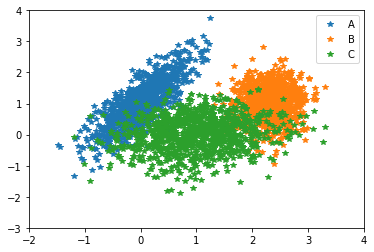

In [10]:
pylab.ylim(-3, 4)
pylab.xlim(-2, 4)
for d in [klass_a, klass_b, klass_c]:
    pylab.plot([x[0] for x in d], [x[1] for x in d], '*')
pylab.legend(['A', 'B', 'C'])

In [11]:
y = []
for k, d in enumerate([klass_a, klass_b, klass_c]):
    t = np.zeros(d.shape[0])
    t[:] = k
    y += t.tolist()
m = GaussianNB().fit(np.concatenate((klass_a, klass_b, klass_c), axis=0), y)
x = np.linspace(-2, 4, 1000)
y = np.linspace(-4, 4, 1000)
px, py = boundary(x, y, m)

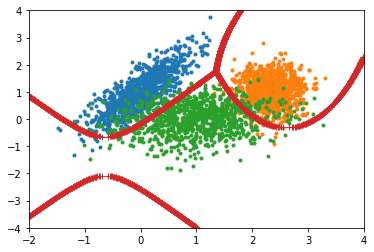

In [12]:
pylab.ylim(-4, 4)
pylab.xlim(-2, 4)
for d in [klass_a, klass_b, klass_c]:
    pylab.plot([x[0] for x in d], [x[1] for x in d], '.')
pylab.plot(px, py, '+')

* Explique la función de decisión
* Se puede mejorar

# Implementación de Bayes Ingenuo

* Sea $\mathcal X$ el conjunto de entrenamiento
* Parámetros  
  * $\sigma_i$
  * $\mu_i$


* En realidad son:  
  * $\sigma_i^c$  
  * $\mu_i^c$

* $\mathcal C_c = \{ (\mathbf x, r) \in \mathcal X \mid r = c \}$


* $\mu_i^c = \frac{\sum_{(\mathbf x, r) \in \mathcal C_c} x_i}{\mid \mathcal C \mid}$

# En python cómo se hace

* Utilizando numpy
* Crear un problema
* Variables independientes

```python   
import numpy as np
mvn = np.random.multivariate_normal
klass_a = mvn([0, 1], [[0.3, 0.5], [0.1, 0.3]], size=1000)
klass_b = mvn([2.3, 1], [[0.1, 0.01], [0.01, 0.3]], size=1000)
klass_c = mvn([1, 0], [[0.5, 0.1], [0.01, 0.3]], size=1000)
```

In [13]:
mvn = np.random.multivariate_normal
klass_a = mvn([0, 1], [[0.3, 0.5], [0.1, 0.3]], size=1000)
klass_b = mvn([2.3, 1], [[0.1, 0.01], [0.01, 0.3]], size=1000)
klass_c = mvn([1, 0], [[0.5, 0.1], [0.01, 0.3]], size=1000)

* Clases y conjunto $\mathcal X$

```python  
y = []
for k, d in enumerate([klass_a, klass_b, klass_c]):
    _ = np.zeros(d.shape[0])
    _.fill(k)
    y += _.tolist()
X = np.concatenate((klass_a, klass_b, klass_c), axis=0)
y = np.array(y)
```

In [14]:

y = []
for k, d in enumerate([klass_a, klass_b, klass_c]):
    _ = np.zeros(d.shape[0])
    _.fill(k)
    y += _.tolist()
X = np.concatenate((klass_a, klass_b, klass_c), axis=0)
y = np.array(y)

* Revolver el conjunto

```python   
index = np.arange(y.shape[0])
np.random.shuffle(index)
X = X[index]
y = y[index]
```

In [15]:
index = np.arange(y.shape[0])
np.random.shuffle(index)
X = X[index]
y = y[index]

* $\mathbf \mu^c$

```python   
mu_a = X[y == 0].mean(axis=0)
```

In [16]:
mu_a = X[y == 0].mean(axis=0)
print(mu_a)

[ 0.01740076  1.01826261]


* $\mathbf \sigma^c$

```python   
std_a = X[y == 0].std(axis=0)
```

In [17]:
std_a = X[y == 0].std(axis=0)
print(std_a)

[ 0.43052804  0.70095922]


```python   
klass_a = mvn([0, 1], [[0.3, 0.5], [0.1, 0.3]], size=1000)
```

# Actividad

* Graficar la función de decisión real del problema de 3 clases
* Implementar un Bayes Ingenuo con distribución normal

# Discriminante Lineal

* Clases son linealmente separables  
* $C = \text{argmax}_j g_j (\mathbf x)$  
* Anteriormente $g_j(\mathbf x) = \log P(C_j | \mathbf x)$  

* Identificar directamente $g$
* $g(\mathbf x \mid \theta_i)$

* $g_i(\mathbf x \mid \mathbf w_i, w_{i0}) = \mathbf w_i \cdot \mathbf x + w_{i0}$

* $g_i(\mathbf x) = \sum_j w_j \phi_{ij} (\mathbf x)$
* Basis functions $\phi$

* $\phi_{j,1}(\mathbf x) = x_1^2$  
* $\phi_{j,2}(\mathbf x) = x_1 \cdot x_2$  
* $\phi_{j,3}(\mathbf x) = x_2^2$  

# Dos clases 

* Observando los valores de la clase
* Es Bernoulli  
$l(\theta \mid \mathcal X) = \prod_t (y_t)^{r_t} (1 - y_t)^{(1-r_t)}$
* $l(\theta \mid \mathcal X) = \prod_{\mathbf x, r \in \mathcal X} g(\mathbf x \mid \theta)^r (1 - g(\mathbf x \mid \theta))^{(1-r)}$


* $E = - \log l$
* $E(\theta \mid \mathcal X) = - \sum_{\mathbf x, r \in \mathcal X} r \log g(\mathbf x \mid \theta) + (1-r) \log (1 - g(\mathbf x \mid \theta))  $

# Regresión logística

* $g(\mathbf x \mid \mathbf w, w_0) = \frac{1}{1 + \exp{-(\mathbf w \cdot \mathbf x + w_0)}}$
* Cómo se puede obtener $\mathbf w$ y $w_0$

* Resolviendo el sistema de ecuaciones  
  $\frac{\partial E}{\partial \mathbf w_i} = 0$ para $i=0 \cdots$

* No existe solución cerrada

# Descenso de gradiente  
* Método de optimización iterativo
* Definido para función derivable
* Minimizar negativo del gradiente

* $\theta_{n+1} = \theta_n - \nu \nabla f(\theta_n) $
* Se require tener $\nabla f(\theta_n)$

* $\nabla f(\theta_n) \equiv ( \frac{\partial E}{\partial \mathbf w_0}, \frac{\partial E}{\partial \mathbf w_1}, \cdots)^{\prime}$
* $\mathbf w_{n+1} = \mathbf w_n - \nu \nabla E(\mathbf w \mid \mathcal X)$

* $\mathbf w_{n+1} = \mathbf w_n + \nu \nabla \log l(\mathbf w \mid \mathcal X)$

* $\log l(\mathbf w \mid \mathcal X) = \sum_{\mathbf x, r \in \mathcal X} r \log g(\mathbf x \mid \theta) + (1-r) \log (1 - g(\mathbf x \mid \theta)) $
* $g(\mathbf x \mid \mathbf w, w_0) = \frac{1}{1 + \exp{-(\mathbf w \cdot \mathbf x + w_0)}}$

# Using sklearn 
```python   
from sklearn.linear_model import LogisticRegression
m = LogisticRegression().fit(X, y)
```

In [18]:
pos = np.random.multivariate_normal([0, 0.3], 
                                    [[0.3, 0.1], [0.1, 0.3]], size=100)
neg = np.random.multivariate_normal([2.3, -0.3], 
                                    [[0.1, 0.01], [0.01, 0.3]], size=100)
X = np.concatenate((pos, neg))
y = np.zeros(pos.shape[0] + neg.shape[0])
y[:pos.shape[0]] = 1
from sklearn.linear_model import LogisticRegression
m = LogisticRegression().fit(X, y)
m_bayes = GaussianNB().fit(X, y)

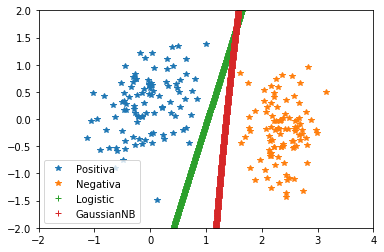

In [19]:
x = np.linspace(-2, 4, 1000)
y = np.linspace(-2, 2, 1000)

pylab.plot([x[0] for x in pos], [x[1] for x in pos], '*')
pylab.plot([x[0] for x in neg], [x[1] for x in neg], '*')
pylab.ylim(-2, 2)
pylab.xlim(-2, 4)

px, py = boundary(x, y, m)
pylab.ylim(-2, 2)
pylab.xlim(-2, 4)
pylab.plot(px, py, '+')
px, py = boundary(x, y, m_bayes)
pylab.plot(px, py, '+')
pylab.legend(['Positiva', 'Negativa', 'Logistic', 'GaussianNB'])

# Tres clases

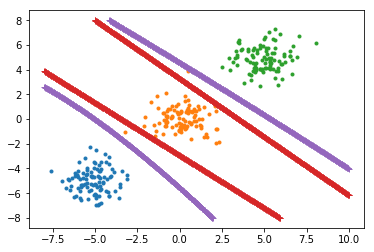

In [20]:
import numpy as np
from sklearn.datasets import make_blobs
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=300, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
# pylab.legend(['Clase 1', 'Clase 2', 'Clase 3'])
m = LogisticRegression().fit(X, y)
px, py = boundary(np.linspace(-8, 10, 1000), np.linspace(-8, 8, 1000), m)
pylab.plot(px, py, '+')
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-8, 10, 1000), np.linspace(-8, 8, 1000), m)
pylab.plot(px, py, '+')
# pylab.legend(['Clase 1', 'Clase 2', 'Clase 3', 'Logistic', 'GaussianNB'])

# Dos clases

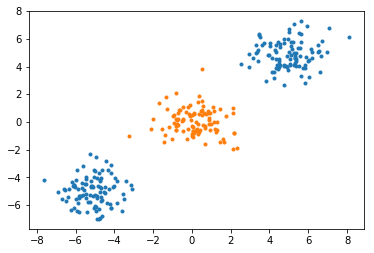

In [21]:
centers = [(-5, -5), (0, 0), (5, 5)]
X, y = make_blobs(n_samples=300, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[-100:] = 0
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')

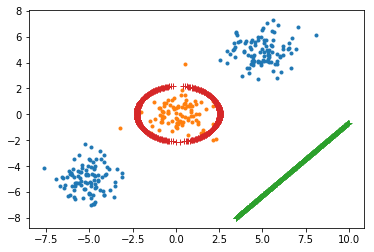

In [22]:
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
# pylab.legend(['Clase 1', 'Clase 2', 'Clase 3'])
m = LogisticRegression().fit(X, y)
px, py = boundary(np.linspace(-8, 10, 1000), np.linspace(-8, 8, 1000), m)
pylab.plot(px, py, '+')
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-8, 10, 1000), np.linspace(-8, 8, 1000), m)
pylab.plot(px, py, '+')

In [23]:
from EvoDAG.model import EvoDAGE
m = EvoDAGE().fit(X, y)

100%|██████████| 30/30 [00:01<00:00, 16.23it/s]


# Usando EvoDAG

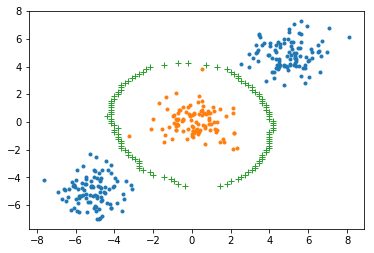

In [24]:
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
px, py = boundary(np.linspace(-8, 10, 100), np.linspace(-8, 8, 100), m)
pylab.plot(px, py, '+')

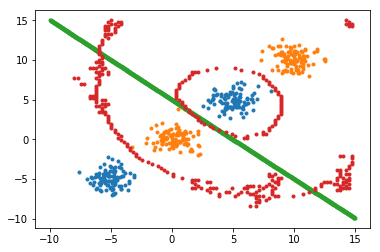

100%|██████████| 30/30 [00:04<00:00,  5.26it/s]
Populating the interactive namespace from numpy and matplotlib


In [25]:
%pylab inline
import numpy as np
from EvoDAG.model import EvoDAGE
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
centers = [(-5, -5), (0, 0), (5, 5), (10, 10)]
X, y = make_blobs(n_samples=400, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
y[200:300] = 0
y[300:] = 1
for k in np.unique(y):
    pylab.plot(X[y == k, 0], X[y == k, 1], '.')
# pylab.legend(['Clase 1', 'Clase 2', 'Clase 3'])
m = GaussianNB().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 1000), np.linspace(-10, 15, 1000), m)
pylab.plot(px, py, '.')
m = EvoDAGE().fit(X, y)
px, py = boundary(np.linspace(-10, 15, 100), np.linspace(-10, 15, 100), m)
pylab.plot(px, py, '.')

# Regresión

* Enfocados a clasificación binaria y multi-clase
* Variable dependiente es  
  $r \in \mathbb R$

* Se busca $h: \mathbf x \rightarrow \mathbb R$

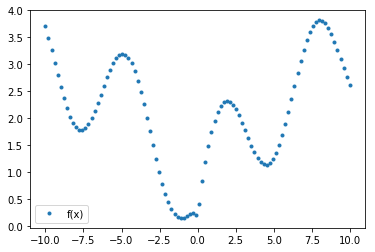

In [26]:
x = np.linspace(-10, 10, 100)
y = np.sin(x) + np.sqrt(np.fabs(x))
pylab.plot(x, y, '.')
pylab.legend(['f(x)'])

# Regresión lineal
* Sea $A$ las observaciones
* $A \equiv (\mathbf x_1, \mathbf x_2, \cdots, \mathbf x_N)$
* $A \mathbf w = r$

* $\mathbf w = A^{-1} r$
* $A$ por lo general no es invertible

* $A^\prime A \mathbf w = A^{\prime} r$
* $\mathbf w = (A^\prime A)^{-1} A^{\prime} r$

* Minimos Cuadrados Ordinarios

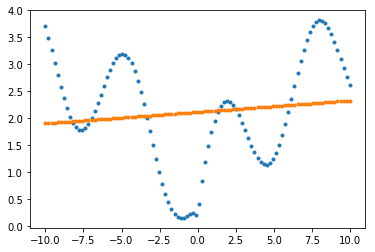

In [27]:
D = np.vstack((x, np.ones(x.shape[0]))).T
coef = np.linalg.lstsq(D, y)[0]
pylab.plot(x, y, '.')
pylab.plot(x, np.dot(D, coef), '.')

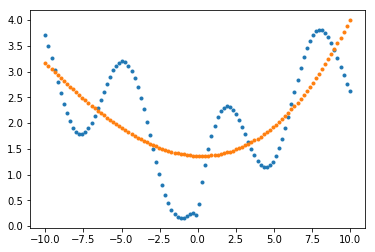

In [28]:
D = np.vstack((x, x**2, x**3, np.ones(x.shape[0]))).T
coef = np.linalg.lstsq(D, y)[0]
pylab.plot(x, y, '.')
pylab.plot(x, np.dot(D, coef), '.')

In [29]:
from EvoDAG.model import EvoDAGE
m = EvoDAGE(classifier=False).fit(np.atleast_2d(x).T, y)

100%|██████████| 30/30 [00:51<00:00,  1.70s/it]


# EvoDAG

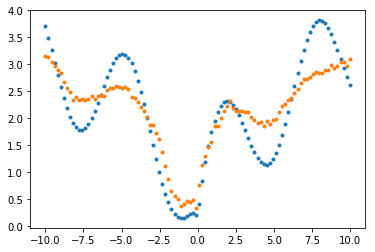

In [30]:
pylab.plot(x, y, '.')
pylab.plot(x, m.predict(np.atleast_2d(x).T), '.')

# Actividad

* Graficar la función de decisión de un clasificador entrenado como un problema de regresión
* Utilizar Basis functions con Regresión Logística en el problema que falló
* Encontrar una función que aproxime los datos de regresión
